## Assignment 2
Author - Shashank Thakre

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/shash/Documents/MScA/Courses/Spring 2021/Machine Learning/Session 1/Assignment 1/bottle.csv", low_memory=False)

#Print the data
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Part A: Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [3]:
#Select only T_degC, Salnty, STheta columns in the data
data = data[['T_degC', 'Salnty', 'STheta', 'O2ml_L', 'Depthm']]

#print the data
data.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


In [4]:
data.shape

(864863, 5)

2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)

In [5]:
#Drop NAs and NANs from the data and verify the shape
data.dropna(inplace = True)

data.reset_index(drop = True, inplace = True)

#Verify that the shape of data is (812174, 3)
data.shape

(661268, 5)

3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

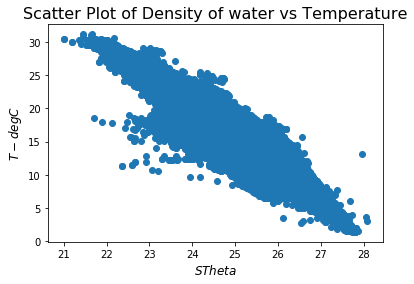

In [6]:
# Scatter: STheta (density of water) vs T_degC
plt.scatter('STheta', 'T_degC', data = data)
plt.xlabel("$STheta$", fontsize=12)
plt.ylabel("$T-degC$", rotation=90, fontsize=12)
plt.title('Scatter Plot of Density of water vs Temperature', fontsize=16)
plt.show()

In [7]:
#Check if there are any records that have STheta > 200
data[data.STheta > 200]

,T_degC,Salnty,STheta,O2ml_L,Depthm


The above shows that there are no outliers in STheta columns

### Part B: Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [8]:
#Import the necessary modules from sklearn
from sklearn.model_selection import train_test_split

In [9]:
# Create X matrix and y vector
X = data[['Salnty','STheta', 'O2ml_L', 'Depthm']]
y = data.T_degC

# convert y to numpy array
y = y.to_numpy()
y = y.reshape(661268, 1)

#Print the shape
print(X.shape)
print(y.shape)

(661268, 4)
(661268, 1)


2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [10]:
# Split the data into train and test by setting random state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((529014, 4), (132254, 4), (529014, 1), (132254, 1))

In [11]:
#Let's print the data
data

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.300,33.0300,25.36400,5.900,0
1,18.460,32.9200,23.56800,6.020,6
2,10.290,32.9510,25.30400,6.040,10
3,10.290,32.9900,25.33500,6.060,15
4,10.330,33.0050,25.33900,6.040,20
...,...,...,...,...,...
661263,18.744,33.4083,23.87055,5.805,0
661264,18.744,33.4083,23.87072,5.805,2
661265,18.692,33.4150,23.88911,5.796,5
661266,18.161,33.4062,24.01426,5.816,10


As can be seen from the above data that the values of all the columns are not on the same scale. 

3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-iLinks to an external site.

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.htmlLinks to an external site.

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform (X_test)

### Part C: Linear Regression with sklearn

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [13]:
# Make necessary imports
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#Fit the model
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

2) Print out the coefficients (including the intercept)

In [14]:
#print the intercept and coefficients
print(f'The intercept and coefficients are {lin_reg.intercept_} and {lin_reg.coef_}')

The intercept and coefficients are [10.91541795] and [[ 1.63046569 -4.6345913   0.3020677  -0.47495536]]


3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn

In [15]:
# Predict the output for X_test
y_pred_sklearn = lin_reg.predict(X_test_scaled)
y_pred_sklearn

array([[16.68352894],
       [ 8.63573844],
       [10.70717149],
       ...,
       [ 6.18878341],
       [10.95304487],
       [16.36582647]])

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [16]:
# Make necessary imports
import sklearn.metrics as metrics

#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_test, y_pred_sklearn)}')

The mean squared error is 0.11101117205433628


In [17]:
#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_test, y_pred_sklearn)}')

The r-squared error is 0.9937682503632342


In [18]:
#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_test, y_pred_sklearn)}')

The explained variance error is 0.9937684088237414


5) Create a scatterplot that shows actual versus predicted values for the T_degC.

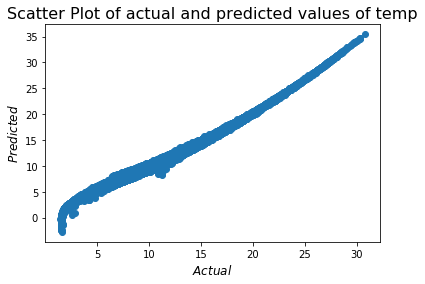

In [19]:
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("$Actual$", fontsize=12)
plt.ylabel("$Predicted$", rotation=90, fontsize=12)
plt.title('Scatter Plot of actual and predicted values of temp', fontsize=16)

plt.show()

**Observation** - The above plot is showing better predictions that in assignment 1 where we only used 2 variables and didn't use standard scaler. In this case the, using a more complex model and standard scaler is giving better results.

### Part D: Gradient Descent Mini-Batch

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

In [20]:
# Add ones for the intercept and run the model
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]  # add x0 = 1 to each instance
X_new_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).  

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

Trying with mini batch of 50

In [21]:
# Calculating with mini batch size of 50
theta_path_mgd = []

n_iterations = 100
minibatch_size = 50

np.random.seed(42)
theta = np.random.randn(5,1)  # random initialization

m = len(X_train_scaled)

eta = 0.1
cost_base = 10000000

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
    cost = 1/minibatch_size * sum((xi.dot(theta) - yi)**2)
    if cost < cost_base:
        theta_base1 = theta
        cost_base = cost


In [22]:
#The intercept and coefficients from linreg are [10.91541795] and [[ 1.63046569 -4.6345913 0.3020677 -0.47495536]]
theta_base1

array([[10.92563908],
       [ 1.64140458],
       [-4.68180543],
       [ 0.31811574],
       [-0.48360972]])

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [23]:
# Predict output for theta calculated using minibatch of 50

y_pred_50 = X_new_b.dot(theta_base1)
y_pred_50

array([[16.77876468],
       [ 8.6254346 ],
       [10.71661809],
       ...,
       [ 6.12187608],
       [10.97521356],
       [16.45726727]])

In [24]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_test, y_pred_50)}')

The mean squared error is 0.11476075299608234


In [25]:
#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_test, y_pred_50)}')

The r-squared error is 0.9935577629930054


In [26]:
#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_test, y_pred_50)}')

The explained variance error is 0.9935619372111408


5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

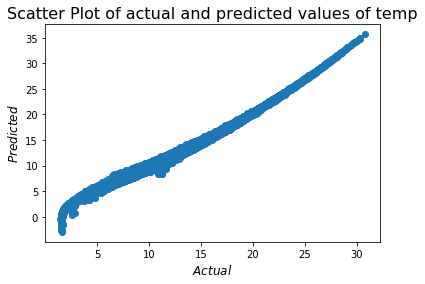

In [27]:
plt.scatter(y_test, y_pred_50)
plt.xlabel("$Actual$", fontsize=12)
plt.ylabel("$Predicted$", rotation=90, fontsize=12)
plt.title('Scatter Plot of actual and predicted values of temp', fontsize=16)

plt.show()

**Observation** - The predictions are coming very close to what we got from the linear regression model

6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

In [28]:
y_pred_train_50 = X_b.dot(theta_base1)
y_pred_train_50

array([[11.28377081],
       [ 7.42160389],
       [13.95680793],
       ...,
       [15.47563358],
       [ 5.04002009],
       [ 8.27162758]])

In [29]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_train, y_pred_train_50)}')

#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_train, y_pred_train_50)}')

#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_train, y_pred_train_50)}')

The mean squared error is 0.11431589367939103
The r-squared error is 0.9935974679989088
The explained variance error is 0.9936033191725722


Trying with mini batch of 250

In [30]:
theta_path_mgd = []

n_iterations = 100
minibatch_size = 250

np.random.seed(42)
theta = np.random.randn(5,1)  # random initialization

m = len(X_train_scaled)

eta = 0.1

cost_base = 10000000

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
    cost = 1/minibatch_size * sum((xi.dot(theta) - yi)**2)
    
    if cost < cost_base:
        theta_base2 = theta
        cost_base = cost

In [31]:
#The intercept and coefficients  from linreg are [10.91541795] and [[ 1.63046569 -4.6345913 0.3020677 -0.47495536]]
theta_base2

array([[10.92183833],
       [ 1.63133626],
       [-4.66319882],
       [ 0.31354857],
       [-0.45439976]])

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [32]:
# Predict output for theta calculated using minibatch of 50

y_pred_250 = X_new_b.dot(theta_base2)
y_pred_250

array([[16.73687833],
       [ 8.62372229],
       [10.70368415],
       ...,
       [ 6.16385447],
       [10.96576412],
       [16.41849037]])

In [33]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_test, y_pred_250)}')

The mean squared error is 0.11198768793850807


In [34]:
#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_test, y_pred_250)}')

The r-squared error is 0.9937134324346072


In [35]:
#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_test, y_pred_250)}')

The explained variance error is 0.993714672875981


5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

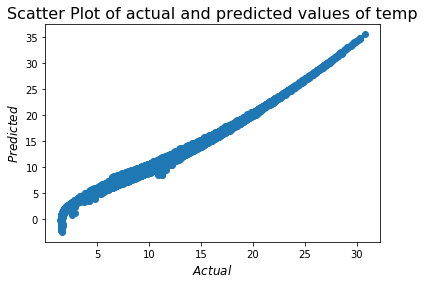

In [36]:
plt.scatter(y_test, y_pred_250)
plt.xlabel("$Actual$", fontsize=12)
plt.ylabel("$Predicted$", rotation=90, fontsize=12)
plt.title('Scatter Plot of actual and predicted values of temp', fontsize=16)

plt.show()

**Observation** - The predictions are coming very close to what we got from the linear regression model

In [37]:
y_pred_train_250 = X_b.dot(theta_base2)
y_pred_train_250

array([[11.27311207],
       [ 7.44093586],
       [13.92516408],
       ...,
       [15.43600434],
       [ 5.11031626],
       [ 8.27124261]])

In [38]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_train, y_pred_train_250)}')

#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_train, y_pred_train_250)}')

#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_train, y_pred_train_250)}')

The mean squared error is 0.11150519839249466
The r-squared error is 0.9937548876362003
The explained variance error is 0.9937571963374106


Trying with a minibatch size of 2000

In [39]:
theta_path_mgd = []

n_iterations = 100
minibatch_size = 2000

np.random.seed(42)
theta = np.random.randn(5,1)  # random initialization

m = len(X_train_scaled)

eta = 0.1
cost_base = 10000000

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
    cost = 1/minibatch_size * sum((xi.dot(theta) - yi)**2)
    if cost < cost_base:
        theta_base3 = theta
        cost_base = cost

In [40]:
#The intercept and coefficients  from linreg are [10.91541795] and [[ 1.63046569 -4.6345913 0.3020677 -0.47495536]]
theta_base3

array([[10.91638425],
       [ 1.62222905],
       [-4.63107929],
       [ 0.29627335],
       [-0.49235293]])

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [41]:
# Predict output for theta calculated using minibatch of 50

y_pred_2000 = X_new_b.dot(theta_base3)
y_pred_2000

array([[16.69563033],
       [ 8.63964668],
       [10.71658911],
       ...,
       [ 6.17765497],
       [10.95669243],
       [16.37716303]])

In [42]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_test, y_pred_2000)}')

The mean squared error is 0.11131012388572654


In [43]:
#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_test, y_pred_2000)}')

The r-squared error is 0.9937514683319107


In [44]:
#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_test, y_pred_2000)}')

The explained variance error is 0.9937514948436814


5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

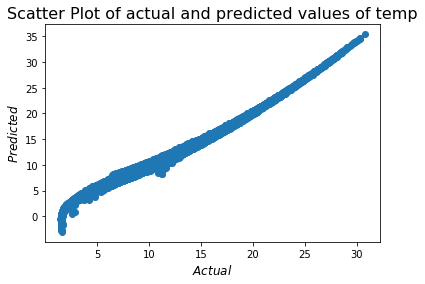

In [45]:
plt.scatter(y_test, y_pred_2000)
plt.xlabel("$Actual$", fontsize=12)
plt.ylabel("$Predicted$", rotation=90, fontsize=12)
plt.title('Scatter Plot of actual and predicted values of temp', fontsize=16)

plt.show()

**Observation** - The predictions are coming very close to what we got from the linear regression model

In [46]:
y_pred_train_2000 = X_b.dot(theta_base3)
y_pred_train_2000

array([[11.2602134 ],
       [ 7.46083037],
       [13.90336448],
       ...,
       [15.40642274],
       [ 5.09461783],
       [ 8.27689486]])

In [47]:
#Print the mean squared error
print(f'The mean squared error is {metrics.mean_squared_error(y_train, y_pred_train_2000)}')

#Print the mean squared error
print(f'The r-squared error is {metrics.r2_score(y_train, y_pred_train_2000)}')

#Print the mean squared error
print(f'The explained variance error is {metrics.explained_variance_score(y_train, y_pred_train_2000)}')

The mean squared error is 0.11089284916524977
The r-squared error is 0.9937891837029772
The explained variance error is 0.9937892359995973


### Part E: Conceptual Questions

#### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

###### Answer
In the normal equation, we do not have to estimate any parameters. The normal equation takes the feautres and always provides a solution that best fits the data.
On the other hand, the gradient descent minimizes the cost function to get a near approximate solution for fitting the data. In gradient descent, we have to estimate some random values of theta as a starting point and estimate some values for the learning rate eta $η$, and the number of iterations that we want to run the algorithm $epoch$.

#### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

##### Answer
Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients
based only on that single instance. Due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Mini Batch gradient descent, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches. This gives better results than Stochastic gradient descent as it uses multiple data points to calculate the gradients.

#### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

##### Answer
The best performing gradient descent model the one that used the 2000 mini batch size.   
The test error metrics are:  
The mean squared error is 0.11131012388572654  
The r-squared error is 0.9937514683319107  
The explained variance error is 0.9937514948436814  

The training error metrics are:  
The mean squared error is 0.11089284916524977  
The r-squared error is 0.9937891837029772  
The explained variance error is 0.9937892359995973  

**Explanation** - R-Square is the proportion of dependent variable that can be explained by the independent variable. If the training r-squared was much higher than the test r-squared the the model would have been overfit. In the case of Gradient Descent with minibatch of 2000, the r-squared error for test and train is very close, indicating that there is no overfit. 

#### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

##### Answer 
The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. The learning rate is multiplied to the gradient vector to determine the size of the downhill step.
It might be helpful to change the learning rate over time as the result gets closer to the final solution so that the process stops very close to the actual minima of the cost function and not bounce around.

#### 5) Why would a data scientist want to use early stopping in gradient descent? 

##### Answer
Gradient descent trains on the data in an iterative way. Iterative methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Hence to avoid overfitting and generalization error, early stopping can be employed.